# Sklearn

model selection

In [2]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

from mlxtend.plotting import plot_decision_regions

Populating the interactive namespace from numpy and matplotlib


,0,1
0,1.162435,-0.061176
1,0.945128,-0.043227
2,1.078331,-0.102277
3,1.156040,0.115038
4,0.999199,0.228718


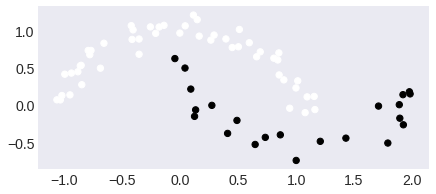

In [92]:
from sklearn.datasets import make_moons

n_samples=100

X, y = make_moons(n_samples=n_samples, shuffle=False, noise=0.1, random_state=1)

# прореживаем, чтобы был дисбаланс
i = (y==0) | (np.random.rand(n_samples) > 0.5)
X = X[i, :]
y = y[i]

plt.figure(figsize=(7, 3))
plt.scatter(X[:,0], X[:,1], 40, y)
pd.DataFrame(X[:5,:])

## train/test

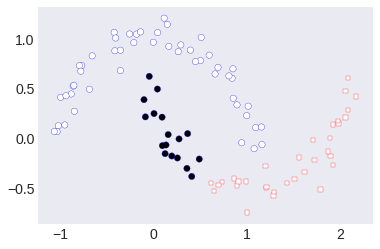

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=43,
                                                    shuffle=False)
plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r')

In [62]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=4, test_size=0.3, random_state=1)

for i, (train_index, test_index) in enumerate(ss.split(np.arange(10))):
    print (i, train_index, test_index)

0 [4 0 3 1 7 8 5] [2 9 6]
1 [0 8 4 2 1 6 7] [9 5 3]
2 [9 0 6 1 7 4 2] [8 3 5]
3 [0 6 1 5 8 7 9] [2 4 3]


In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=1)

for i, (train_index, test_index) in enumerate(ss.split(np.arange(10),
                                             [1,1,1,1,0,0,0,0,0,0])):
    print (i, train_index, test_index)

0 [8 4 0 2 5 3 6] [7 9 1]
1 [9 3 4 7 5 2 1] [6 8 0]
2 [8 7 0 3 6 4 2] [5 9 1]
3 [0 2 9 5 3 6 8] [7 1 4]


In [85]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=10)

for i, (train_index, test_index) in enumerate(gss.split(np.arange(10),
                                                       groups=[1,1,1,2,2,2,3,3,4,4])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [3 4 5 6 7 8 9] [0 1 2]
1 [3 4 5 6 7 8 9] [0 1 2]
2 [3 4 5 6 7 8 9] [0 1 2]
3 [3 4 5 6 7 8 9] [0 1 2]
4 [0 1 2 6 7 8 9] [3 4 5]
5 [0 1 2 3 4 5 6 7] [8 9]
6 [0 1 2 6 7 8 9] [3 4 5]
7 [0 1 2 3 4 5 8 9] [6 7]
8 [0 1 2 6 7 8 9] [3 4 5]
9 [0 1 2 3 4 5 8 9] [6 7]


## k-Fold

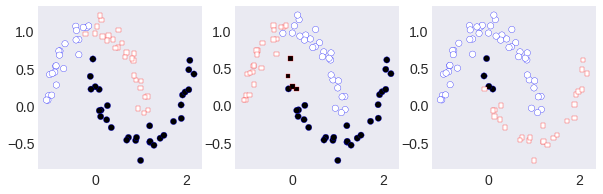

In [51]:
from sklearn.model_selection import KFold

n_splits=3

kf = KFold(n_splits=n_splits, random_state=1, shuffle=False)

plt.figure(figsize=(10, 3))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(1, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r')
    

In [52]:
kf.n_splits

3

In [53]:
for i, (train_index, test_index) in enumerate(kf.split(np.arange(10))):
    print (i, train_index, test_index)

0 [4 5 6 7 8 9] [0 1 2 3]
1 [0 1 2 3 7 8 9] [4 5 6]
2 [0 1 2 3 4 5 6] [7 8 9]


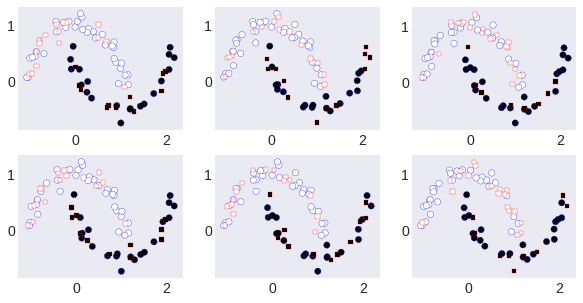

In [54]:
from sklearn.model_selection import RepeatedKFold

n_splits = 3
n_repeats = 2

kf = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=1)

plt.figure(figsize=(10, 5))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(n_repeats, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r')
    

In [55]:
for i, (train_index, test_index) in enumerate(kf.split(np.arange(10))):
    print (i, train_index, test_index)

0 [0 1 3 5 7 8] [2 4 6 9]
1 [2 4 5 6 7 8 9] [0 1 3]
2 [0 1 2 3 4 6 9] [5 7 8]
3 [1 2 4 6 7 8] [0 3 5 9]
4 [0 1 3 5 6 7 9] [2 4 8]
5 [0 2 3 4 5 8 9] [1 6 7]


## LOO

In [57]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(np.arange(10))):
    print (i, train_index, test_index)

0 [1 2 3 4 5 6 7 8 9] [0]
1 [0 2 3 4 5 6 7 8 9] [1]
2 [0 1 3 4 5 6 7 8 9] [2]
3 [0 1 2 4 5 6 7 8 9] [3]
4 [0 1 2 3 5 6 7 8 9] [4]
5 [0 1 2 3 4 6 7 8 9] [5]
6 [0 1 2 3 4 5 7 8 9] [6]
7 [0 1 2 3 4 5 6 8 9] [7]
8 [0 1 2 3 4 5 6 7 9] [8]
9 [0 1 2 3 4 5 6 7 8] [9]


In [60]:
from sklearn.model_selection import LeavePOut

loo = LeavePOut(2)

for i, (train_index, test_index) in enumerate(loo.split(np.arange(10))):
    print (i, train_index, test_index)
    if i > 10:
        print ('...')
        break


0 [2 3 4 5 6 7 8 9] [0 1]
1 [1 3 4 5 6 7 8 9] [0 2]
2 [1 2 4 5 6 7 8 9] [0 3]
3 [1 2 3 5 6 7 8 9] [0 4]
4 [1 2 3 4 6 7 8 9] [0 5]
5 [1 2 3 4 5 7 8 9] [0 6]
6 [1 2 3 4 5 6 8 9] [0 7]
7 [1 2 3 4 5 6 7 9] [0 8]
8 [1 2 3 4 5 6 7 8] [0 9]
9 [0 3 4 5 6 7 8 9] [1 2]
10 [0 2 4 5 6 7 8 9] [1 3]
11 [0 2 3 5 6 7 8 9] [1 4]
...


## StratifiedKFold

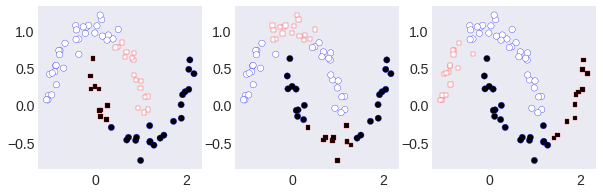

In [69]:
from sklearn.model_selection import StratifiedKFold

n_splits=3

skf = StratifiedKFold(n_splits=n_splits, random_state=1, shuffle=False)

plt.figure(figsize=(10, 3))
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # + y!!!
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    plt.subplot(1, n_splits, i+1)
    plt.scatter(X_train[:,0], X_train[:,1], 40, y_train, lw=0.3, edgecolor='b')
    plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, marker='s', lw=0.3, edgecolor='r') 

In [71]:
skf = StratifiedKFold(n_splits=4, random_state=1, shuffle=False)

for i, (train_index, test_index) in enumerate(skf.split(np.arange(10),
                                                       [1,1,1,0,0,0,0,0,0,0])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [1 2 5 6 7 8 9] [0 3 4]
1 [0 2 3 4 7 8 9] [1 5 6]
2 [0 1 3 4 5 6 8 9] [2 7]
3 [0 1 2 3 4 5 6 7] [8 9]


In [80]:
from sklearn.model_selection import GroupKFold


gkf = GroupKFold(n_splits=4)

for i, (train_index, test_index) in enumerate(gkf.split(np.arange(10),
                                                       groups=[1,1,1,2,2,2,3,3,4,4])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break


0 [0 1 2 6 7 8 9] [3 4 5]
1 [3 4 5 6 7 8 9] [0 1 2]
2 [0 1 2 3 4 5 6 7] [8 9]
3 [0 1 2 3 4 5 8 9] [6 7]


In [82]:
 from sklearn.model_selection import LeaveOneGroupOut

logo = LeaveOneGroupOut()

for i, (train_index, test_index) in enumerate(logo.split(np.arange(10),
                                                       groups=[1,1,1,2,2,2,3,3,4,4])):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [3 4 5 6 7 8 9] [0 1 2]
1 [0 1 2 6 7 8 9] [3 4 5]
2 [0 1 2 3 4 5 8 9] [6 7]
3 [0 1 2 3 4 5 6 7] [8 9]


## Time Series

In [88]:
from sklearn.model_selection import TimeSeriesSplit



tscv = TimeSeriesSplit(n_splits=3) # + появился gap


for i, (train_index, test_index) in enumerate(tscv.split(np.arange(10))):
    print (i, train_index, test_index)
    # if i > 10:
    #     print ('...')
    #     break

0 [0 1 2 3] [4 5]
1 [0 1 2 3 4 5] [6 7]
2 [0 1 2 3 4 5 6 7] [8 9]


# оценка работы алгоритмов

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv = ShuffleSplit(n_splits=10,
                  test_size=0.25,
                  random_state=1)
scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print (f'accuracy = {scores.mean().round(3)} \u00B1 {scores.std().round(3)}')

accuracy = 0.85 ± 0.07


Text(0, 0.5, 'accuracy')

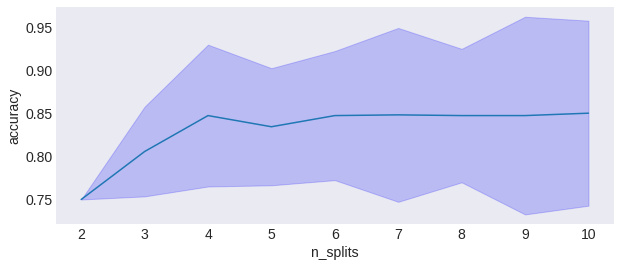

In [107]:
accs = []
stds = []
pars = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in pars:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
    accs.append(scores.mean())
    stds.append(scores.std())
    
accs = np.array(accs)    
stds = np.array(stds)
    
plt.figure(figsize=(10, 4))    
plt.fill_between(pars, accs - stds, accs + stds, color='b', alpha=0.2)
plt.plot(pars, accs)
plt.xlabel('n_splits')
plt.ylabel('accuracy')
    

In [123]:
from sklearn.model_selection import validation_curve

logreg = LogisticRegression()
cv = KFold(n_splits=4, shuffle=True, random_state=1)

param_range = [0.01, 0.1, 1.0, 10, 100]
train_scores, test_scores = validation_curve(estimator=logreg, X=X, y=y,
                                             param_name='C',
                                             param_range=param_range,
                                             cv=cv, scoring='accuracy')
train_scores_means = train_scores.mean(axis=1)
train_scores_stds = train_scores.std(axis=1)
test_scores_means = test_scores.mean(axis=1)
test_scores_stds = test_scores.std(axis=1)

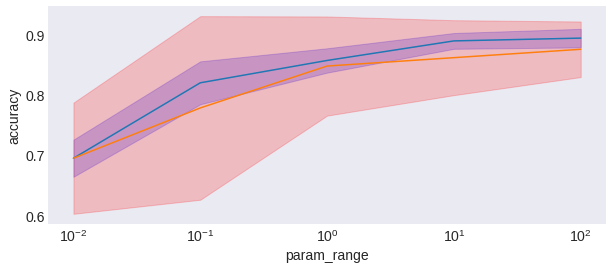

In [126]:
plt.figure(figsize=(10, 4))    
plt.fill_between(param_range,
                train_scores_means - train_scores_stds,
                 train_scores_means + train_scores_stds,
                 color='b', alpha=0.2)
plt.plot(param_range, train_scores_means)
plt.fill_between(param_range,
                test_scores_means - test_scores_stds,
                 test_scores_means + test_scores_stds,
                 color='r', alpha=0.2)
plt.plot(param_range, test_scores_means)
plt.xlabel('param_range')
plt.ylabel('accuracy')
plt.xscale('log')

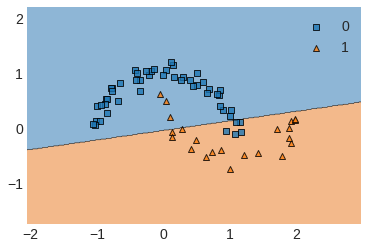

In [128]:
logreg = LogisticRegression(C=100)
logreg.fit(X, y)
plot_decision_regions(X, y, logreg)

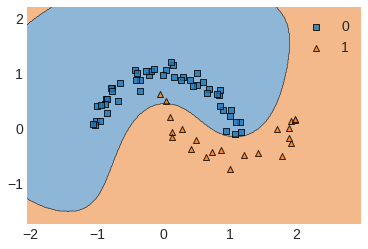

In [132]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X, y)
plot_decision_regions(X, y, svm)

## cross_val_predict

In [129]:
from sklearn.model_selection import cross_val_predict

In [135]:
logreg = LogisticRegression(C=100)
svm = SVC(C=1.0, kernel='rbf', probability=True)

In [136]:
cv = KFold(n_splits=4, shuffle=True, random_state=1)

a_logreg = cross_val_predict(estimator=logreg, X=X, y=y,
                       cv = cv, method='predict_proba')

a_svm = cross_val_predict(estimator=svm, X=X, y=y,
                       cv = cv, method='predict_proba')

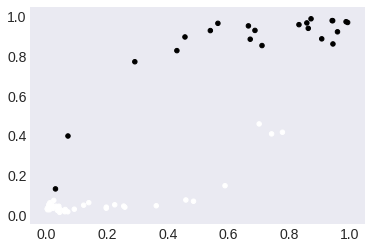

In [142]:
plt.scatter(a_logreg[:,1], a_svm[:,1], 20, y)

## Learning curve

Text(0, 0.5, 'accuracy')

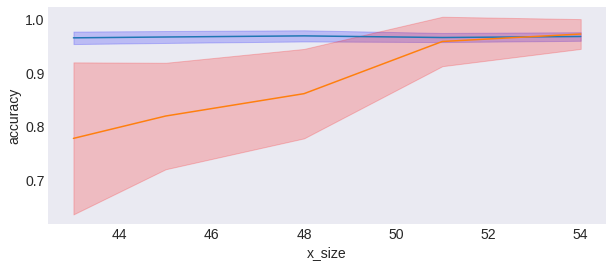

In [156]:
from sklearn.model_selection import learning_curve

svm = SVC(C=1.0, kernel='rbf', probability=True)
cv = KFold(n_splits=4, shuffle=True, random_state=1)

train_sizes = np.linspace(0,1,21)[1:]

train_sizes, train_scores, test_scores = learning_curve(estimator=svm,
                                                        X=X,
                                                        y=y,
                                                        cv=cv,
                                                        train_sizes=train_sizes)

train_scores_means = train_scores.mean(axis=1)
train_scores_stds = train_scores.std(axis=1)
test_scores_means = test_scores.mean(axis=1)
test_scores_stds = test_scores.std(axis=1)

plt.figure(figsize=(10, 4))    
plt.fill_between(train_sizes,
                train_scores_means - train_scores_stds,
                 train_scores_means + train_scores_stds,
                 color='b', alpha=0.2)
plt.plot(train_sizes, train_scores_means)
plt.fill_between(train_sizes,
                test_scores_means - test_scores_stds,
                 test_scores_means + test_scores_stds,
                 color='r', alpha=0.2)
plt.plot(train_sizes, test_scores_means)
plt.xlabel('x_size')
plt.ylabel('accuracy')


In [158]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)

Text(0, 0.5, 'accuracy')

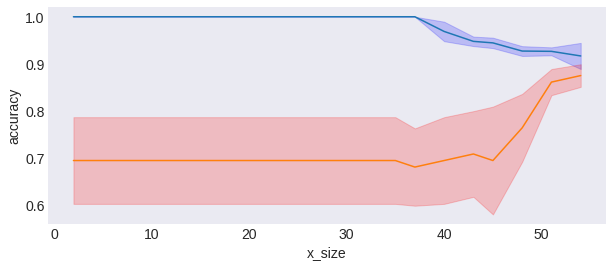

In [159]:
train_sizes = np.linspace(0,1,21)[1:]

train_sizes, train_scores, test_scores = learning_curve(estimator=dtc,
                                                        X=X,
                                                        y=y,
                                                        cv=cv,
                                                        train_sizes=train_sizes)

train_scores_means = train_scores.mean(axis=1)
train_scores_stds = train_scores.std(axis=1)
test_scores_means = test_scores.mean(axis=1)
test_scores_stds = test_scores.std(axis=1)

plt.figure(figsize=(10, 4))    
plt.fill_between(train_sizes,
                train_scores_means - train_scores_stds,
                 train_scores_means + train_scores_stds,
                 color='b', alpha=0.2)
plt.plot(train_sizes, train_scores_means)
plt.fill_between(train_sizes,
                test_scores_means - test_scores_stds,
                 test_scores_means + test_scores_stds,
                 color='r', alpha=0.2)
plt.plot(train_sizes, test_scores_means)
plt.xlabel('x_size')
plt.ylabel('accuracy')


## GridSearch

In [162]:
svm = SVC(C=1.0, kernel='rbf', probability=False)

In [164]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':(0.1, 1, 1.0),
              'kernel':('rbf', 'poly', 'sigmoid'),
              'degree':(1,2,3),
              'gamma':(0.1,1,1.0)} # , scoring='roc_auc'
clf = GridSearchCV(svm, parameters, cv=cv, )
clf.fit(X, y)
clf.cv_results_['mean_test_score']


array([0.69444444, 0.69444444, 0.69444444, 0.69444444, 0.73611111,
       0.68055556, 0.69444444, 0.73611111, 0.68055556, 0.69444444,
       0.69444444, 0.69444444, 0.69444444, 0.80555556, 0.68055556,
       0.69444444, 0.80555556, 0.68055556, 0.69444444, 0.69444444,
       0.69444444, 0.69444444, 0.84722222, 0.68055556, 0.69444444,
       0.84722222, 0.68055556, 0.80555556, 0.73611111, 0.73611111,
       0.97222222, 0.86111111, 0.76388889, 0.97222222, 0.86111111,
       0.76388889, 0.80555556, 0.69444444, 0.73611111, 0.97222222,
       0.81944444, 0.76388889, 0.97222222, 0.81944444, 0.76388889,
       0.80555556, 0.69444444, 0.73611111, 0.97222222, 0.83333333,
       0.76388889, 0.97222222, 0.83333333, 0.76388889, 0.80555556,
       0.73611111, 0.73611111, 0.97222222, 0.86111111, 0.76388889,
       0.97222222, 0.86111111, 0.76388889, 0.80555556, 0.69444444,
       0.73611111, 0.97222222, 0.81944444, 0.76388889, 0.97222222,
       0.81944444, 0.76388889, 0.80555556, 0.69444444, 0.73611

In [167]:
import pandas as pd
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000776,0.000205,0.000530,0.000234,0.1,1,0.1,rbf,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'...",0.666667,0.555556,0.777778,0.777778,0.694444,0.092128,57
1,0.000473,0.000096,0.000311,0.000006,0.1,1,0.1,poly,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'...",0.666667,0.555556,0.777778,0.777778,0.694444,0.092128,57
2,0.000452,0.000011,0.000363,0.000039,0.1,1,0.1,sigmoid,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'...",0.666667,0.555556,0.777778,0.777778,0.694444,0.092128,57
3,0.000470,0.000015,0.000333,0.000011,0.1,1,1,rbf,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ...",0.666667,0.555556,0.777778,0.777778,0.694444,0.092128,57
4,0.000449,0.000051,0.000326,0.000009,0.1,1,1,poly,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ...",0.777778,0.555556,0.777778,0.833333,0.736111,0.106683,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.000434,0.000016,0.000317,0.000015,1,3,1,poly,"{'C': 1.0, 'degree': 3, 'gamma': 1, 'kernel': ...",0.722222,0.833333,0.888889,0.888889,0.833333,0.068041,19
77,0.000428,0.000009,0.000326,0.000016,1,3,1,sigmoid,"{'C': 1.0, 'degree': 3, 'gamma': 1, 'kernel': ...",0.944444,0.722222,0.722222,0.666667,0.763889,0.106683,35
78,0.000438,0.000014,0.000319,0.000008,1,3,1,rbf,"{'C': 1.0, 'degree': 3, 'gamma': 1.0, 'kernel'...",1.000000,0.944444,1.000000,0.944444,0.972222,0.027778,1
79,0.000434,0.000019,0.000321,0.000020,1,3,1,poly,"{'C': 1.0, 'degree': 3, 'gamma': 1.0, 'kernel'...",0.722222,0.833333,0.888889,0.888889,0.833333,0.068041,19


In [168]:
clf.best_params_, clf.best_score_

({'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, 0.9722222222222223)

In [172]:
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.utils.fixes import loguniform

distributions = dict(gamma=uniform(0, 10),
                     C=loguniform(0.01,10),
                     kernel=['rbf', 'poly', 'sigmoid'],
                     degree=[1,2,3])

clf = RandomizedSearchCV(svm, distributions, random_state=1,
                         scoring='accuracy', cv=cv)
search = clf.fit(X, y)

In [185]:
search.best_estimator_

SVC(C=3.4588581370567506, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma=6.852195003967595,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [186]:
search.best_params_

{'C': 3.4588581370567506,
 'degree': 2,
 'gamma': 6.852195003967595,
 'kernel': 'rbf'}

In [188]:
search.best_score_

1.0

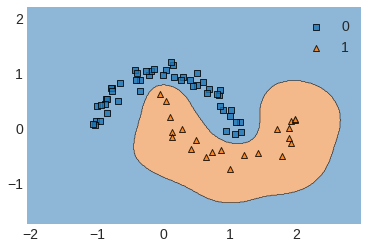

In [190]:
svm = search.best_estimator_
svm.fit(X, y)
plot_decision_regions(X, y, svm)